In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# 1. Load and clean dataset
df = pd.read_csv('datasets/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df = df.set_index('Month')
df.head()

,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [14]:
# train_test split
train = df.iloc[:-12]
test = df.iloc[-12:]

result = adfuller(train['Thousands of Passengers'])
print("ADF p-value: ", result[1])

ADF p-value:  0.993080298889752


In [ ]:
best_aic = np.inf
best_order = None

for p in range(5):
    for d in range(3):
        for q in range(5):
            try:
                model = ARIMA(train['Passengers'], order=(p, d, q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_order = (p, d, q)
            except:
                continue

# find the best model and forecast
final_model = ARIMA(train['Thousands of Passengers'], order=best_order).fit()
forecast = final_model.forecast(steps=len(test))

# MAE evaluation
mae = mean_absolute_error(test['Thousands of Passengers'], test)



In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df['Passengers_diff'] = df['Thousands of Passengers'].diff().dropna()

In [6]:
df.head()

,Thousands of Passengers,Passengers_diff
Month,,
1949-01,112.0,NaN
1949-02,118.0,6.0
1949-03,132.0,14.0
1949-04,129.0,-3.0
1949-05,121.0,-8.0


Text(0.5, 1.0, 'PACF')

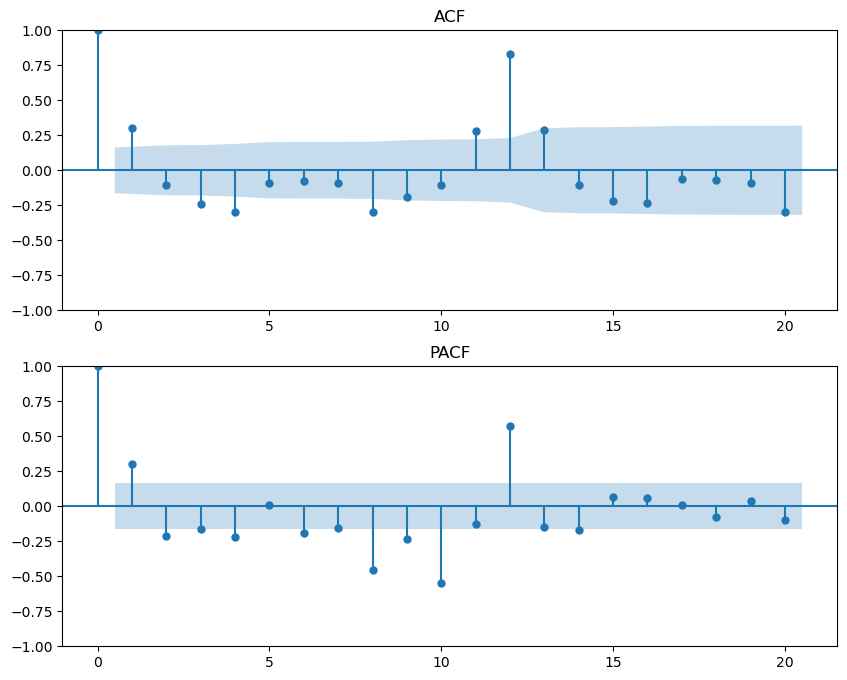

In [7]:
fig, ax= plt.subplots(2, 1, figsize=(10, 8))

plot_acf(df['Passengers_diff'].dropna(), ax=ax[0], lags=20)
ax[0].set_title('ACF')

plot_pacf(df['Passengers_diff'].dropna(), ax=ax[1], lags=20)
ax[1].set_title('PACF')


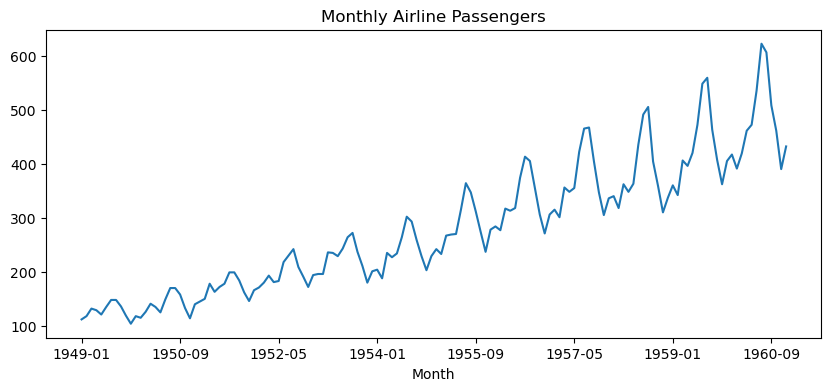

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# 2. Plot original series
df['Thousands of Passengers'].plot(figsize=(10, 4), title='Monthly Airline Passengers')
plt.show()

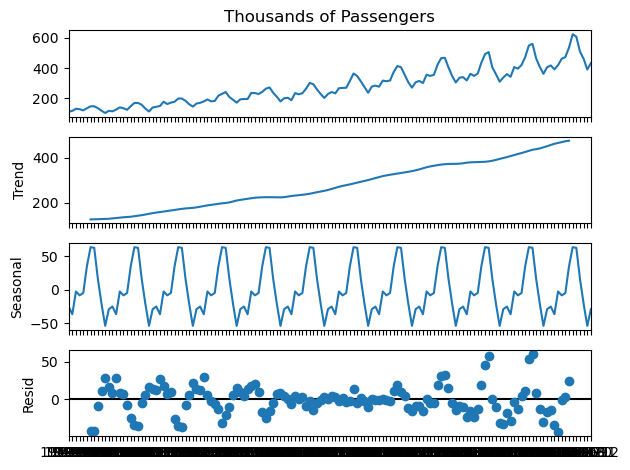

In [11]:
# decompose
seasonal_decompose = seasonal_decompose(df['Thousands of Passengers'].dropna(), model='addictive', period=12)
seasonal_decompose.plot()
plt.show()

In [12]:
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1,1 ,1,12)).fit()



/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39275D+00    |proj g|=  8.25120D-02

At iterate    5    f=  3.38837D+00    |proj g|=  4.21308D-02

At iterate   10    f=  3.38448D+00    |proj g|=  1.08591D-02

At iterate   15    f=  3.37932D+00    |proj g|=  1.38382D-02

At iterate   20    f=  3.37699D+00    |proj g|=  2.31788D-03

At iterate   25    f=  3.37642D+00    |proj g|=  1.51364D-03

At iterate   30    f=  3.37632D+00    |proj g|=  6.38726D-04

At iterate   35    f=  3.37628D+00    |proj g|=  3.47089D-04

At iterate   40    f=  3.37627D+00    |proj g|=  8.33874D-04

At iterate   45    f=  3.37626D+00    |proj g|=  7.82928D-05

At iterate   50    f=  3.37626D+00    |proj g|=  9.65766D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
forecast = model.get_forecast(steps=12)
predicted = forecast.predicted_mean

1. Do exponential smoothening

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('datasets/airline_passengers.csv')
df = df.set_index('Month')
y = df['Thousands of Passengers']
df.head()


,Thousands of Passengers
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


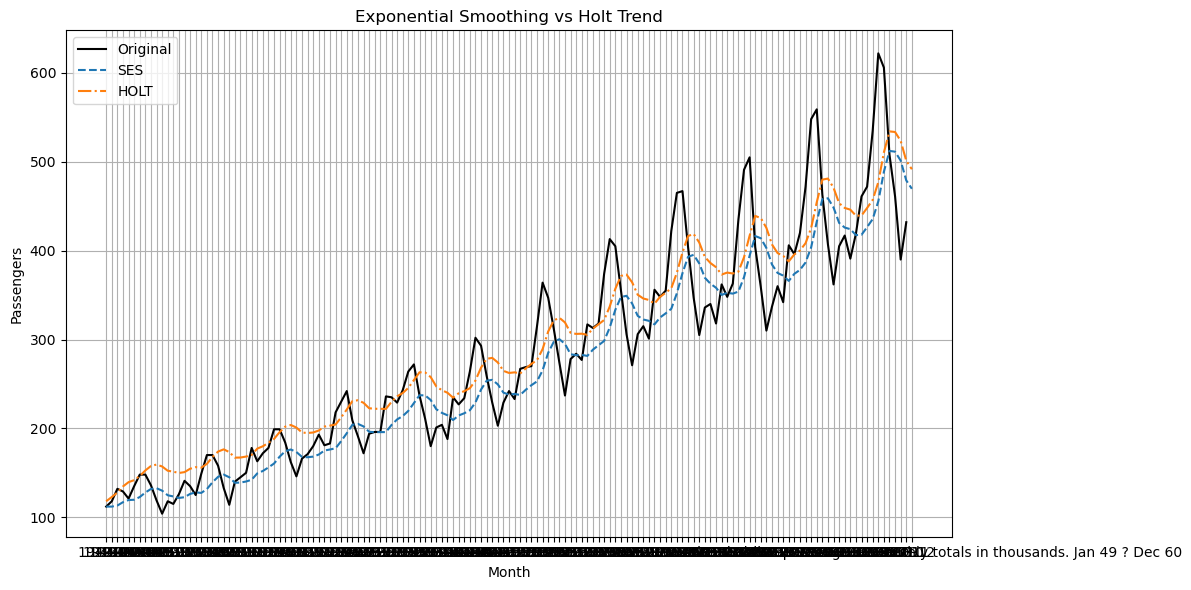

In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

# 1. Simple Exponential Smoothening
ses_model= SimpleExpSmoothing(y).fit(smoothing_level=0.2, optimized=False)
ses_forcast = ses_model.fittedvalues

# 2. Holt Linear Trend Method
holt_model = Holt(y).fit(smoothing_level=0.2, optimized=True)
holt_forecast = holt_model.fittedvalues 

plt.figure(figsize=(12, 6))
plt.plot(y, label='Original', color='black')
plt.plot(ses_forcast, label='SES', linestyle='--')
plt.plot(holt_forecast, label='HOLT', linestyle='-.')
plt.title('Exponential Smoothing vs Holt Trend')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

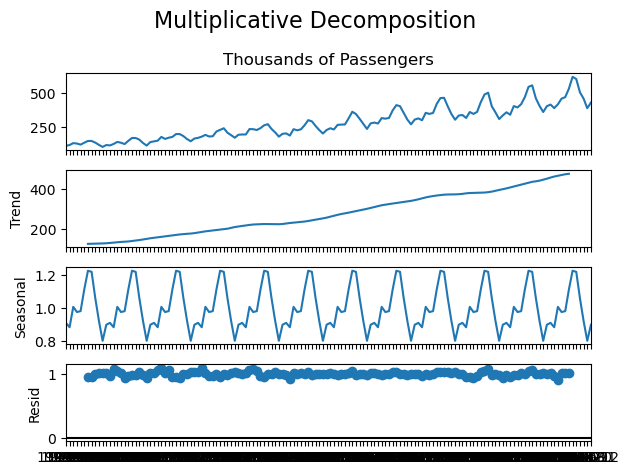

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

# Step 1: Load and set index
decomposition = seasonal_decompose(y.dropna(), model='multiplicative', period=12)
decomposition.plot()
plt.suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout()
plt.show()


In [11]:
adfuller_result = adfuller(df['Thousands of Passengers'])
# print("ADF Statistics: ", adfuller_result[0])
print(adfuller_result)
# print('p-value: ', adfuller_result[1])

(nan, nan, 0, 144, {'1%': -3.476597917537401, '5%': -2.8818291230495543, '10%': -2.5775887982253085}, nan)


In [13]:
print(df['Thousands of Passengers'].isnull().sum())
print(df['Thousands of Passengers'].dtype)

1
float64


In [14]:
print(df.columns)

Index(['Thousands of Passengers'], dtype='object')


In [15]:
# Step 1: Load and set index
df = pd.read_csv('dataset.csv')
df = df.set_index('Month')
df.index = pd.to_datetime(df.index)
y = df['Sales']

In [16]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


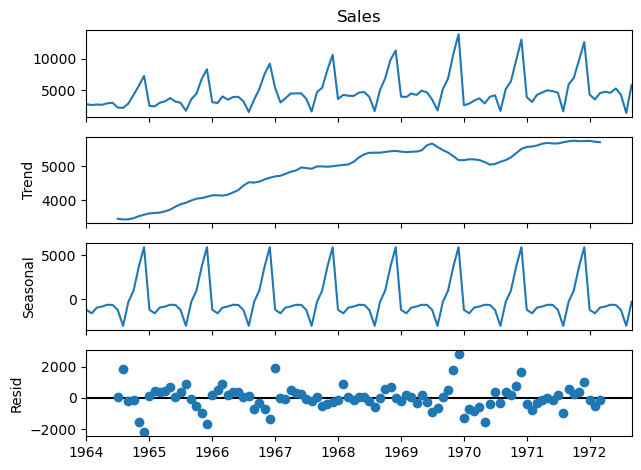

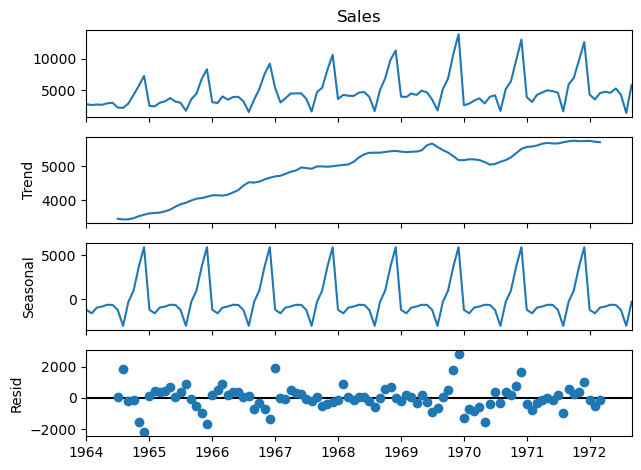

In [17]:
decomposition = seasonal_decompose(y, model='addictive', period=12)
decomposition.plot()

In [18]:
adf = adfuller(y)
print(adf)

(-1.833593056327616, 0.3639157716602485, 11, 93, {'1%': -3.502704609582561, '5%': -2.8931578098779522, '10%': -2.583636712914788}, 1478.4633060594724)


In [19]:
print('ADF Statistics: ', adf[0])
print('p-value: ', adf[1])

ADF Statistics:  -1.833593056327616
p-value:  0.3639157716602485


In [22]:
# Differencing 
df['Diff1'] = df['Sales'].diff()
df.head()

,Sales,Diff1
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [23]:
df_diff = df['Diff1'].dropna()

In [24]:
adf = adfuller(df_diff)
print('ADF Statistics: ', adf[0])
print('p-value: ', adf[1])

ADF Statistics:  -7.189896448050987
p-value:  2.5196204473872455e-10


Text(0.5, 1.0, 'ACF')

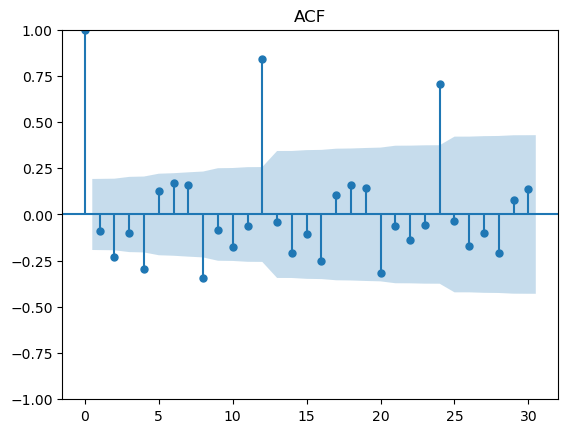

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_diff, lags=30)
plt.title('ACF')

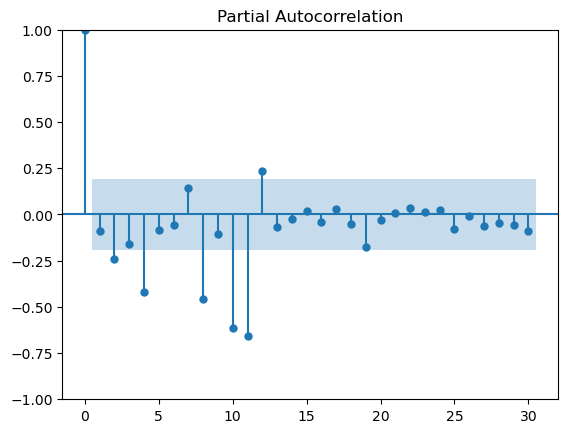

In [29]:
plot_pacf(df_diff,lags=30 )
plt.show();

In [43]:
# Arima and Sarima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

train = df.iloc[:-12]
test = df.iloc[-12:]

arima_model = ARIMA(train['Thousands of Passengers'], order=(2, 1, 2))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=12) 

sarima_model = SARIMAX(train['Thousands of Passengers'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=12) 



 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39275D+00    |proj g|=  8.25120D-02

At iterate    5    f=  3.38837D+00    |proj g|=  4.21308D-02

At iterate   10    f=  3.38448D+00    |proj g|=  1.08591D-02

At iterate   15    f=  3.37932D+00    |proj g|=  1.38382D-02

At iterate   20    f=  3.37699D+00    |proj g|=  2.31788D-03

At iterate   25    f=  3.37642D+00    |proj g|=  1.51364D-03

At iterate   30    f=  3.37632D+00    |proj g|=  6.38726D-04

At iterate   35    f=  3.37628D+00    |proj g|=  3.47089D-04

At iterate   40    f=  3.37627D+00    |proj g|=  8.33874D-04

At iterate   45    f=  3.37626D+00    |proj g|=  7.82928D-05

At iterate   50    f=  3.37626D+00    |proj g|=  9.65766D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
print(arima_forecast)

133    435.937895
134    461.396830
135    486.207577
136    503.888237
137    510.300325
138    504.568838
139    489.077270
140    468.605541
141    448.899496
142    435.089328
143    430.384017
144    435.365413
Name: predicted_mean, dtype: float64


In [45]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Test', color='black')
plt.plot(test.index, arima_forecast, label='Test', color='red')
plt.plot(test.index, sarima_forecast, label='Test', color='green')

KeyError: 'Sales'

<Figure size 1200x600 with 0 Axes>

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39275D+00    |proj g|=  8.25120D-02

At iterate    5    f=  3.38837D+00    |proj g|=  4.21308D-02


 This problem is unconstrained.



At iterate   10    f=  3.38448D+00    |proj g|=  1.08591D-02

At iterate   15    f=  3.37932D+00    |proj g|=  1.38382D-02

At iterate   20    f=  3.37699D+00    |proj g|=  2.31788D-03

At iterate   25    f=  3.37642D+00    |proj g|=  1.51364D-03

At iterate   30    f=  3.37632D+00    |proj g|=  6.38726D-04

At iterate   35    f=  3.37628D+00    |proj g|=  3.47089D-04

At iterate   40    f=  3.37627D+00    |proj g|=  8.33874D-04

At iterate   45    f=  3.37626D+00    |proj g|=  7.82928D-05


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.37626D+00    |proj g|=  9.65766D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   9.658D-05   3.376D+00
  F =   3.3762598999848623     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


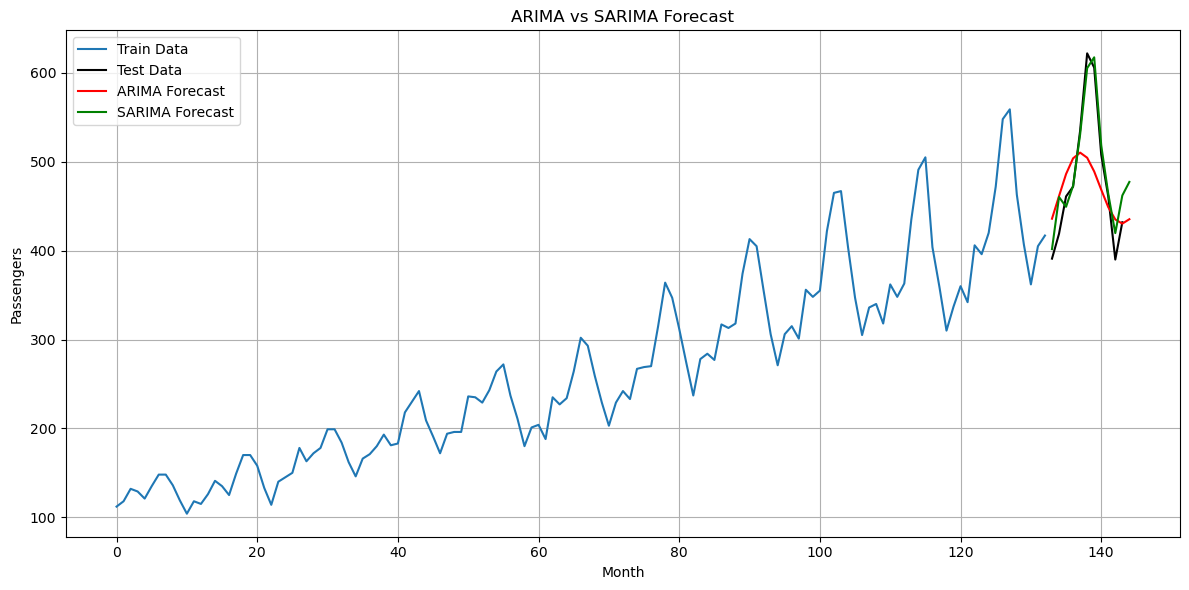

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# 1. Load and clean dataset
df = pd.read_csv('datasets/airline_passengers.csv')

# Train-test split
train = df.iloc[:-12]
test = df.iloc[-12:]

# -----------------------
# ARIMA Model (2,1,2)
# -----------------------
arima_model = ARIMA(train['Thousands of Passengers'], order=(2, 1, 2))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=12)  # returns a Series

# -----------------------
# SARIMA Model (1,1,1)(1,1,1,12)
# -----------------------
sarima_model = SARIMAX(train['Thousands of Passengers'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=12)  # returns a Series

# -----------------------
# Plotting
# -----------------------
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Thousands of Passengers'], label='Train Data')
plt.plot(test.index, test['Thousands of Passengers'], label='Test Data', color='black')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('ARIMA vs SARIMA Forecast') 
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX



# 3. Fit ARIMA and SARIMA models with common parameters for this dataset
# ARIMA Model (p=2, d=1, q=1)
arima_model = SARIMAX(train, order=(2, 1, 1), simple_differencing=False)
arima_result = arima_model.fit(disp=False)
arima_predictions = arima_result.get_forecast(steps=len(test)).predicted_mean

# SARIMA Model (p=2, d=1, q=1) with seasonal order (P=1, D=1, Q=1, S=12)
sarima_model = SARIMAX(train, order=(2, 1, 1), seasonal_order=(1, 1, 1, 12), simple_differencing=False)
sarima_result = sarima_model.fit(disp=False)
sarima_predictions = sarima_result.get_forecast(steps=len(test)).predicted_mean

# 4. Plot the predictions
plt.figure(figsize=(14, 8))
plt.plot(df['Sales'], label='Original Sales', color='blue')
plt.plot(arima_predictions, label='ARIMA Predictions', color='green', linestyle='--')
plt.plot(sarima_predictions, label='SARIMA Predictions', color='red', linestyle='--')
plt.title('ARIMA vs SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

# You can also save the plot
# plt.savefig('arima_sarima_predictions.png')

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Load and set index
df = pd.read_csv('dataset.csv')
df = df.set_index('Month')
df.index = pd.to_datetime(df.index)
y = df['Sales']

# 2. Split data into training and testing sets
train_data = df['Sales'][:'1957']
test_data = df['Sales']['1958':]

# 3. Fit ARIMA and SARIMA models with common parameters for this dataset
# Use the ARIMA class from statsmodels.tsa.arima.model as requested
arima_model = ARIMA(train_data, order=(2, 1, 1))
arima_result = arima_model.fit()
arima_predictions = arima_result.get_forecast(steps=len(test_data)).predicted_mean

# Use the SARIMAX class for the seasonal model, as ARIMA does not support seasonality
sarima_model = SARIMAX(train_data, order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
sarima_predictions = sarima_result.get_forecast(steps=len(test_data)).predicted_mean

# 4. Plot the predictions
plt.figure(figsize=(14, 8))
plt.plot(df['Sales'], label='Original Sales', color='blue')
plt.plot(arima_predictions, label='ARIMA Predictions', color='green', linestyle='--')
plt.plot(sarima_predictions, label='SARIMA Predictions', color='red', linestyle='--')
plt.title('ARIMA vs SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

# You can also save the plot
# plt.savefig('arima_sarima_predictions.png')

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:534: RuntimeWarning: invalid value encountered in scalar divide
  return -self.loglike(params, *args) / nobs
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/s

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=          NaN    |proj g|=          NaN


LinAlgError: Schur decomposition solver error.

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


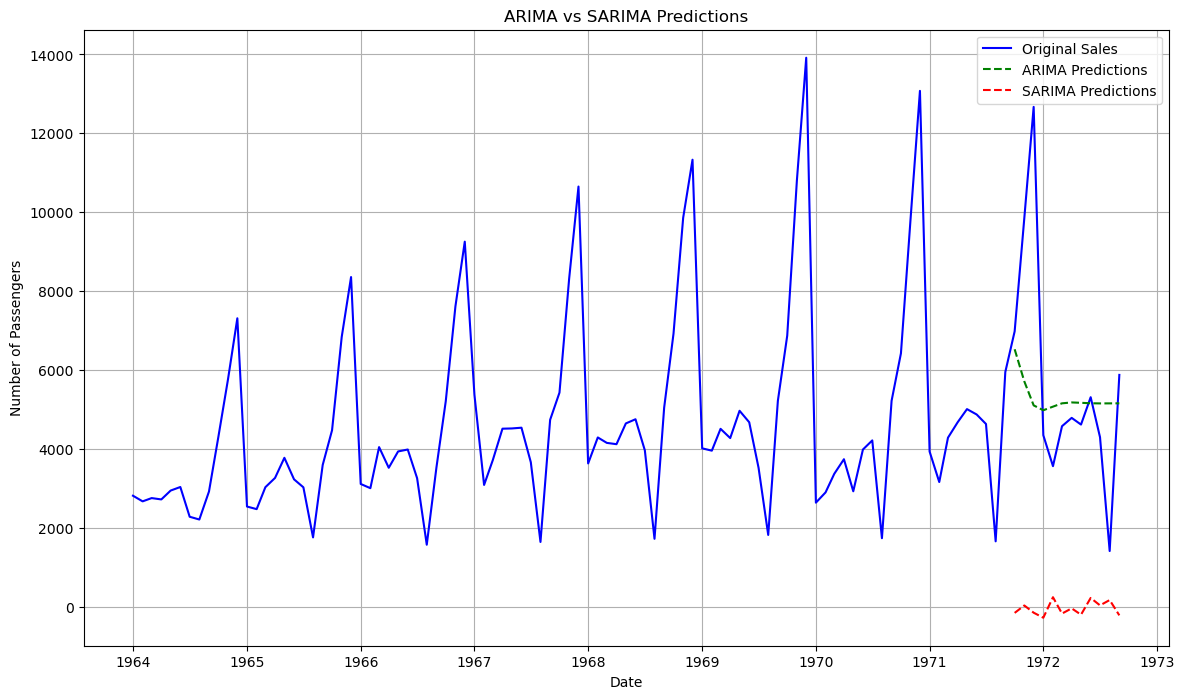

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Step 1: Load and set index
df = pd.read_csv('dataset.csv')
df = df.set_index('Month')
df.index = pd.to_datetime(df.index)
y = df['Sales']


# 2. Split data into training and testing sets
train_data = df['Sales'][:-12]
test_data = df['Sales'][-12:]

# 3. Fit ARIMA and SARIMA models with a simplified, more robust approach
# Using the ARIMA class from statsmodels.tsa.arima.model
# A common, stable choice for the ARIMA model on this dataset is (2, 1, 1).
# Setting simple_differencing=True can help with numerical stability.
arima_model = ARIMA(train_data, order=(2, 1, 1))
arima_result = arima_model.fit()
arima_predictions = arima_result.get_forecast(steps=len(test_data)).predicted_mean

# Using the SARIMAX class for the seasonal model
# Using a slightly simplified seasonal order (0, 1, 1, 12) can improve stability.
sarima_model = SARIMAX(train_data, order=(2, 1, 1), seasonal_order=(0, 1, 1, 12), simple_differencing=True)
sarima_result = sarima_model.fit(disp=False)
sarima_predictions = sarima_result.get_forecast(steps=len(test_data)).predicted_mean

# 4. Plot the predictions
plt.figure(figsize=(14, 8))
plt.plot(df['Sales'], label='Original Sales', color='blue')
plt.plot(arima_predictions, label='ARIMA Predictions', color='green', linestyle='--')
plt.plot(sarima_predictions, label='SARIMA Predictions', color='red', linestyle='--')
plt.title('ARIMA vs SARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


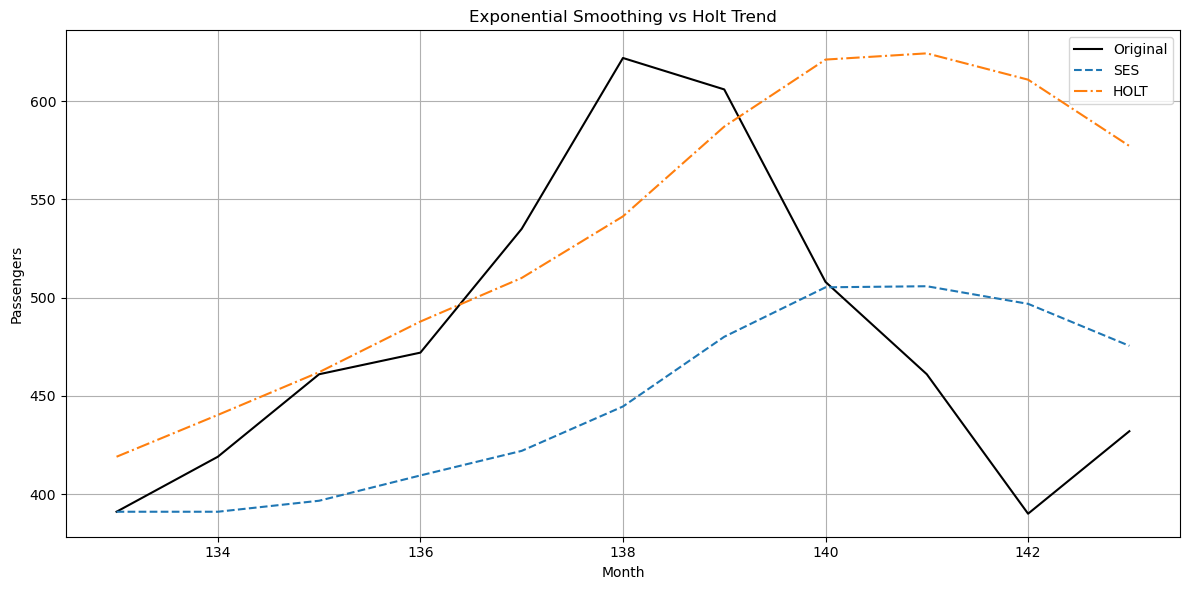

In [55]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

# 1. Load and clean dataset
df = pd.read_csv('datasets/airline_passengers.csv')

# Train-test split
train = df.iloc[:-12]
test = df.iloc[-12:]
y = test['Thousands of Passengers'].dropna()

# 1. Simple Exponential Smoothening
ses_model= SimpleExpSmoothing(y).fit(smoothing_level=0.2, optimized=False)
ses_forcast = ses_model.fittedvalues

# 2. Holt Linear Trend Method
holt_model = Holt(y).fit(smoothing_level=0.2, optimized=True)
holt_forecast = holt_model.fittedvalues 

plt.figure(figsize=(12, 6))
plt.plot(y, label='Original', color='black')
plt.plot(ses_forcast, label='SES', linestyle='--')
plt.plot(holt_forecast, label='HOLT', linestyle='-.')
plt.title('Exponential Smoothing vs Holt Trend')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.39275D+00    |proj g|=  8.25120D-02

At iterate    5    f=  3.38837D+00    |proj g|=  4.21308D-02

At iterate   10    f=  3.38448D+00    |proj g|=  1.08591D-02

At iterate   15    f=  3.37932D+00    |proj g|=  1.38382D-02

At iterate   20    f=  3.37699D+00    |proj g|=  2.31788D-03

At iterate   25    f=  3.37642D+00    |proj g|=  1.51364D-03

At iterate   30    f=  3.37632D+00    |proj g|=  6.38726D-04

At iterate   35    f=  3.37628D+00    |proj g|=  3.47089D-04

At iterate   40    f=  3.37627D+00    |proj g|=  8.33874D-04

At iterate   45    f=  3.37626D+00    |proj g|=  7.82928D-05


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.37626D+00    |proj g|=  9.65766D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   9.658D-05   3.376D+00
  F =   3.3762598999848623     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


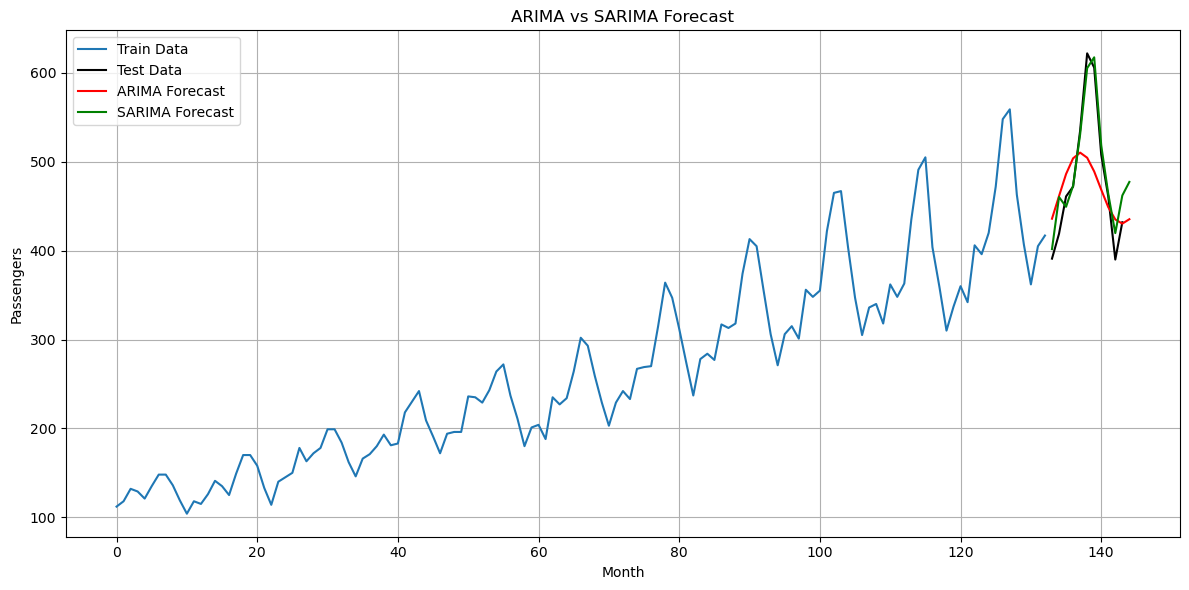

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error



# -----------------------
# ARIMA Model (2,1,2)
# -----------------------
arima_model = ARIMA(train['Thousands of Passengers'], order=(2, 1, 2))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=12)  # returns a Series

# -----------------------
# SARIMA Model (1,1,1)(1,1,1,12)
# -----------------------
sarima_model = SARIMAX(train['Thousands of Passengers'],
                       order=(1,1,1),
                       seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=12)  # returns a Series

# -----------------------
# Plotting
# -----------------------
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Thousands of Passengers'], label='Train Data')
plt.plot(test.index, test['Thousands of Passengers'], label='Test Data', color='black')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title('ARIMA vs SARIMA Forecast') 
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

